# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from urllib.request import urlretrieve

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
urlretrieve('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', '../../../data/apple_stock.csv')


('../../../data/apple_stock.csv', <http.client.HTTPMessage at 0x18dd2da0ca0>)

### Step 3. Assign it to a variable apple

In [4]:
apple_df = pd.read_csv('../../../data/apple_stock.csv')
apple_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [7]:
apple_df['Date'] = pd.to_datetime(apple_df.Date)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [8]:
apple_df.set_index('Date', drop=True, inplace=True)
apple_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [9]:
apple_df.index.duplicated().sum()

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple_df.sort_index(axis=0, inplace=True)
apple_df[(apple_df.index.month == 1) & (apple_df.index.year == 1981)]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1981-01-02,34.50,34.75,34.50,34.50,5415200,0.54
1981-01-05,33.87,33.87,33.75,33.75,8932000,0.53
1981-01-06,32.37,32.37,32.25,32.25,11289600,0.50
1981-01-07,31.00,31.00,30.88,30.88,13921600,0.48
1981-01-08,30.37,30.37,30.25,30.25,9956800,0.47
1981-01-09,31.88,32.00,31.88,31.88,5376000,0.50
1981-01-12,31.88,31.88,31.62,31.62,5924800,0.49
1981-01-13,30.63,30.63,30.50,30.50,5762400,0.48
1981-01-14,30.63,30.75,30.63,30.63,3572800,0.48


### Step 9. Get the last business day of each month

In [18]:
month_end = apple_df.resample(rule='BM', axis=0).last()
month_end.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [21]:
days_difference = apple_df.index[-1] - apple_df.index[0]
days_difference

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [26]:
num_months = apple_df.resample('M').first()
num_months.shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

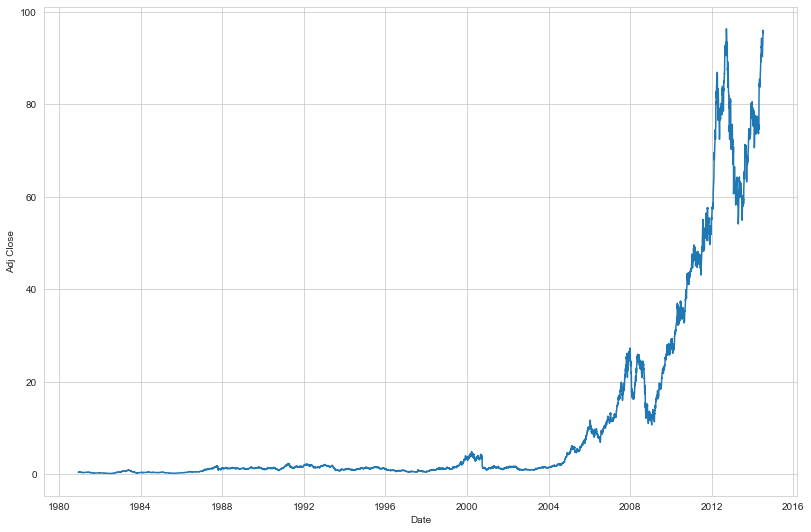

In [40]:
plt.rcParams['figure.figsize'] = (10, 7)
# plt.figure(figsize=(13.5, 9))
sns.set_style('whitegrid')
sns.lineplot(data=apple_df, x=apple_df.index, y='Adj Close');


### BONUS: Create your own question and answer it.

### Show the trend for the Trading Volume over each Year

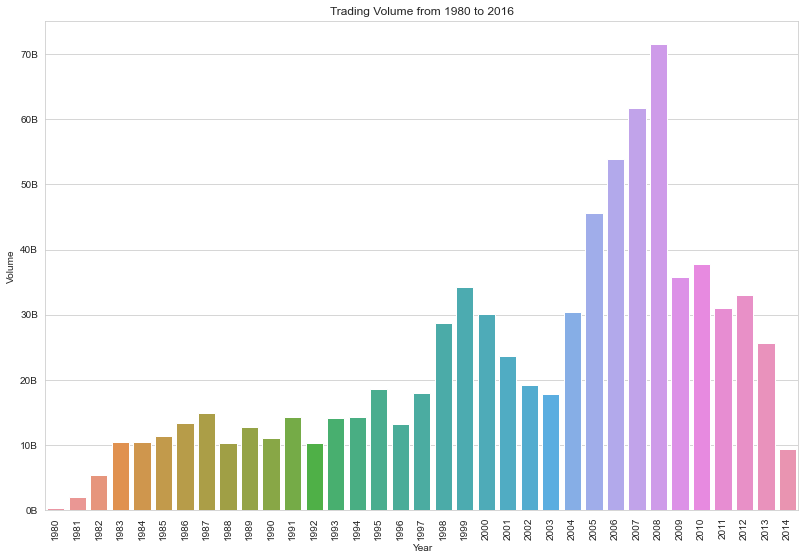

In [76]:
volume_per_year = apple_df.resample('A')[['Volume']].sum()
volume_per_year.index = volume_per_year.index.to_period('Y')
ax = sns.barplot(data=volume_per_year, x=volume_per_year.index, y='Volume', )
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: f'{int(x/1000000000)}B'))
ax.set_title('Trading Volume from 1980 to 2016')
ax.set_xlabel('Year')
ax.tick_params(axis='x', rotation=90);